In [ ]:
import pandas as pd

#Parse dates se encarga de ponerle un formato al indice
df = pd.read_csv('/content/USDCOP=X.csv', index_col=0, parse_dates=True)

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,4525.299805,4526.399902,4464.209961,4525.299805,4525.299805,0
2023-05-09,4504.750000,4551.620117,4501.270020,4504.750000,4504.750000,0
2023-05-10,4559.250000,4568.919922,4544.060059,4559.250000,4559.250000,0
2023-05-11,4548.000000,4606.000000,4547.330078,4548.000000,4548.000000,0
2023-05-12,4594.500000,4595.799805,4557.819824,4594.500000,4594.500000,0
...,...,...,...,...,...,...
2024-05-01,3907.750000,3914.209961,3898.030029,3907.750000,3907.750000,0
2024-05-02,3912.250000,3912.250000,3886.000000,3912.250000,3912.250000,0
2024-05-03,3895.750000,3908.350098,3862.500000,3895.750000,3895.750000,0


<Axes: xlabel='Date'>

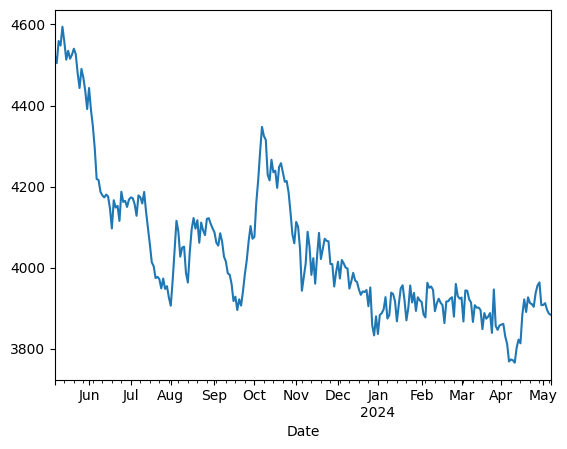

In [ ]:
ts = df['Close']
ts.plot()

In [ ]:
train = ts[:'2024-05-01']
test= ts['2024-05-01':]

In [ ]:
df_train = pd.DataFrame(train.values, index = train.index, columns = ['t'])
for i in range (1,4):
  df_train[f't-{i}'] = df_train['t'].shift(i)
df_train = df_train.dropna()
df_train

,t,t-1,t-2,t-3
Date,,,,
2023-05-11,4548.000000,4559.250000,4504.750000,4525.299805
2023-05-12,4594.500000,4548.000000,4559.250000,4504.750000
2023-05-15,4557.029785,4594.500000,4548.000000,4559.250000
2023-05-16,4513.250000,4557.029785,4594.500000,4548.000000
2023-05-17,4535.149902,4513.250000,4557.029785,4594.500000
...,...,...,...,...
2024-04-25,3937.500000,3903.199951,3909.850098,3912.620117
2024-04-26,3956.010010,3937.500000,3903.199951,3909.850098
2024-04-29,3963.489990,3956.010010,3937.500000,3903.199951


In [ ]:
y_train = df_train['t']
X_train = df_train.drop('t', axis=1)

In [ ]:
# prompt: Saca el error cuadratico medio de train

import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = df_train['t-1']
mse = mean_squared_error(y_train, y_pred)

print("Train RMSE:", np.sqrt(mse))


Train RMSE: 37.98016262769521


In [ ]:
import numpy as np
df_test = pd.DataFrame(test.values, index = test.index, columns = ['t'])
for i in range (1,4):
  df_test[f't-{i}'] = df_test['t'].shift(i)
df_test = df_test.dropna()
y_test = df_test['t']
X_test = df_test.drop('t', axis=1)

y_pred_test = df_test['t-1']
mse_test = mean_squared_error(y_test, y_pred_test)

print("Test RMSE:", np.sqrt(mse_test))


Test RMSE: 7.041435495443036


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error for train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the train and test RMSE
print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))


Train RMSE: 23.61190659454596
Test RMSE: 20.451852560534725


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
model = RandomForestRegressor(max_depth=5, n_estimators=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error for train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the train and test RMSE
print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))


Train RMSE: 26.434952499773104
Test RMSE: 23.665624138041977


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor
model = KNeighborsRegressor(n_neighbors=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error for train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the train and test RMSE
print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))


Train RMSE: 25.837838313394787
Test RMSE: 26.439324577245813


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the mean squared error for train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the train and test RMSE
print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))


Train RMSE: 37.08598045700926
Test RMSE: 11.049622309753422
